In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Recap: Linear Algebra in Actiom

In [ ]:
Features (ML) = Columns

object has a set of features: (hight, width, green color intensity)

Categories to identify (in our smart camera system):

Category 1 - Deciduous tree (trees that lose levase in fall, like oak, maple)
Category 2 - Evergreen tree (trees that stay green year-round - like pine, spruce)
Category 3 - Bush (short, bushy plants - like scrubs, hedges)
Category 4 - Not a plant (wall, pole, building, etc.)

In [3]:
objects = np.array([
    [8.5, 3.2, 85],
    [10.2, 4.1, 78],
    [3.0, 2.5, 12],
    [7.8, 2.9, 92],
    [2.8, 2.3, 8],
    [9.1, 3.8, 81]
])

# featurs(columns): hight, width, green color intensity

objects

array([[ 8.5,  3.2, 85. ],
       [10.2,  4.1, 78. ],
       [ 3. ,  2.5, 12. ],
       [ 7.8,  2.9, 92. ],
       [ 2.8,  2.3,  8. ],
       [ 9.1,  3.8, 81. ]])

In [4]:
objects.shape

(6, 3)

In [5]:
# weights - its an array/matrix/vector that we apply 
# on the input (a row of the objects matrix) to get a prediction (the category of object)

In [ ]:
Use Matrix Multiplication:
    objects @ weights = prediction

In [9]:
# the weights/coefficient matrix (to apply on object), 
# the shape is (number of categories, number of features)
# the shape (4, 3)
# weights = np.array([
#     [1.0, 0.8, 2.0], # Category 1 - Deciduous tree
#     [1.2, 0.5, 1.8], # Category 2 - Evergreen tree
#     [0.6, 0.7, 1.5], # Category 3 - Bush
#     [0.3, 0.9, 0.1] # Category 4 - Not a plant
# ])

# weights.T # transpose the weights

# the shape is (number of features, number of categories)
# the shape (3, 4)

weights = np.array([
    [1. , 1.2, 0.6, 0.3], # Feature 1
    [0.8, 0.5, 0.7, 0.9], # Feature 2
    [2. , 1.8, 1.5, 0.1] # Feature 3
])

# every column is a category type weights
# every row the feature

weights

array([[1. , 1.2, 0.6, 0.3],
       [0.8, 0.5, 0.7, 0.9],
       [2. , 1.8, 1.5, 0.1]])

In [12]:
scores = objects @ weights # Prediction scores: (6, 4) - (objects, category score)
scores

array([[181.06, 164.8 , 134.84,  13.93],
       [169.48, 154.69, 125.99,  14.55],
       [ 29.  ,  26.45,  21.55,   4.35],
       [194.12, 176.41, 144.71,  14.15],
       [ 20.64,  18.91,  15.29,   3.71],
       [174.14, 158.62, 129.62,  14.25]])

In [16]:
np.argmax(scores, axis = 1)

array([0, 0, 0, 0, 0, 0])

In [17]:
# Measuer the confidence in our results
# Test if the scores are real/random
# Quantify uncertainly

In [ ]:
population = All of the tips ever given in human history
sample = 244 restaurant tips

In [18]:
object1_scores = scores[0]
object1_scores

array([181.06, 164.8 , 134.84,  13.93])

In [19]:
np.mean(object1_scores)

np.float64(123.65750000000001)

In [20]:
# The two ways to calculate standart deviation
np.std(object1_scores)

np.float64(65.48458764281868)

In [21]:
np.std(object1_scores, ddof = 1)

np.float64(75.61508860670601)

In [ ]:
## SciPy - used for advanced statistical test (t-test, ANOVA, chi-square)
# Probability distributions (normal, binominal, poisson etc.)
# Statistical modeling (regression analysis)
# Optimization, integrations, signal processing

Numpy provides:
- Arrays and basic operations
- Basic statistics: mean, mrdian, std, percentiles

Numpy: What is the data? (descriptive)
Scipy: What can we conclude from the data

In [22]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tip_amount = tips_df['tip'].values
tip_amount[:5]

array([1.01, 1.66, 3.5 , 3.31, 3.61])

In [26]:
describe = scipy.stats.describe(tip_amount)

In [29]:
describe.nobs # number of observations

np.int64(244)

In [31]:
describe.minmax # min and max

(np.float64(1.0), np.float64(10.0))

In [32]:
describe.mean # average

np.float64(2.99827868852459)

In [33]:
describe.variance

np.float64(1.9144546380624712)

In [34]:
describe.skewness # measure of asymmetry - positive and means that most values are located on the left side of the distribution

np.float64(1.4564266884221506)

In [35]:
describe.kurtosis # measures tail heaviness, the values are the mean

np.float64(3.5495519893455114)

<Axes: ylabel='Count'>

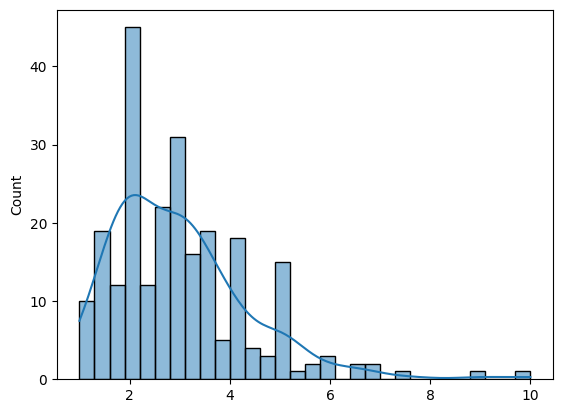

In [36]:
sns.histplot(tip_amount, bins = 30, kde = True)

# plt.axvline (descibe.mean, color = 'red')

## Understanding Data Distribution

In [ ]:
What is 'Spread' or 'Variability'?

In [ ]:
DATASET_A = [50, 51, 50, 49, 50] -> All are close to 50
DATASET_B = [20, 40, 50, 60, 80] -> Values spread far from 50

In [ ]:
Standart deviation (std) tells us is how far values typically are from the mean

In [39]:
mean = describe.mean

In [40]:
std = np.std(tip_amount)

In [ ]:
typical range of the values in data is going to be:

(mean - std) to (mean + std)

In [41]:
print(f'{(mean - std)} to {(mean + std)}')

1.6174787346946944 to 4.379078642354485


In [ ]:
Mean = $3.0
Std = $1.0

Most tips: 2.0 and 4.0 (within the 1st std)
$1.0 and $5.0 (within 2 std)
$0.0 and $6.0 (within 3 std)

In [ ]:
Small std - values are clustered tightly (consistency)
Large std - values spread widely (incosistent)

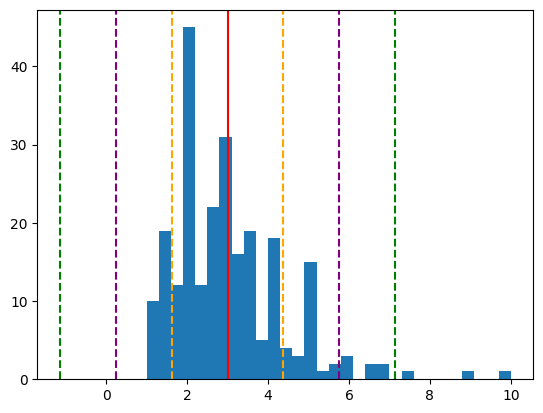

In [45]:
plt.hist(tip_amount, bins = 30)

plt.axvline(mean, color = 'red')

plt.axvline(mean + std, color = 'orange', linestyle = '--') # 1st std
plt.axvline(mean - std, color = 'orange', linestyle = '--')

plt.axvline(mean + 2*std, color = 'purple', linestyle = '--') # 2nd std
plt.axvline(mean - 2*std, color = 'purple', linestyle = '--')

plt.axvline(mean + 3*std, color = 'green', linestyle = '--') # 3d std
plt.axvline(mean - 3*std, color = 'green', linestyle = '--')

In [49]:
# Exercise: Count the tips within 1st standart deviation

lower_1st = tip_amount > mean - std
high_1st = tip_amount < mean + std

first_std_map = (lower_1st) & (high_1st)
sum(first_std_map) # most of the data in 1st standart deviation

np.int64(182)

In [50]:
tip_amount.size 

244

In [ ]:
# Exercise: 
# Use scipy.stats.describe() on the total_bill column from the tips_dataset. Interpret the skewness value
# data = [12, 15, 13, 12, 18, 20, 22, 21]
# - use describe to get all statistics
# - print the mean, median, variance, std, skewness
# - interpret the skewness: is the data symmetric, left-skewed or right - skewed

In [54]:
total_bill_a = tips_df['total_bill']
scipy.stats.describe(total_bill_a)

DescribeResult(nobs=np.int64(244), minmax=(np.float64(3.07), np.float64(50.81)), mean=np.float64(19.78594262295082), variance=np.float64(79.25293861397827), skewness=np.float64(1.1262346334818638), kurtosis=np.float64(1.1691681323851366))

In [55]:
describe.skewness

np.float64(1.4564266884221506)

In [56]:
data = [12, 15, 13, 12, 18, 20, 22, 21]
scipy.stats.describe(data)

DescribeResult(nobs=np.int64(8), minmax=(np.int64(12), np.int64(22)), mean=np.float64(16.625), variance=np.float64(17.125), skewness=np.float64(0.06525681329773589), kurtosis=np.float64(-1.6476734867850917))

In [57]:
describe.mean

np.float64(2.99827868852459)

In [59]:
np.median(data)

np.float64(16.5)

In [60]:
describe.variance

np.float64(1.9144546380624712)

In [62]:
np.std(data)

np.float64(3.8709656418005056)

In [64]:
describe.skewness # right-skewed

np.float64(1.4564266884221506)

## PDF (Probability Density Function)
How commin is this value?<br>
The PDF tells you the height or the bell curve at any point<br>
Higher PDF value = more common value <br>
Lower PDF value = more rare<br>

In the tips column:<br>
- pdf(3.0) -> High value (tips around 3 dollars are common)<br>
- pdf(10.0) -> Low value (tips around 10 dollars are rare)

In [67]:
tip_mean = np.mean(tip_amount)
tip_mean

np.float64(2.99827868852459)

In [69]:
tip_std = np.std(tip_amount)
tip_std

np.float64(1.3807999538298954)

In [70]:
tip_distribution = scipy.stats.norm(loc = tip_mean, scale = tip_std) 
tip_distribution

In [65]:
x = np.linspace (0, 7, 1000)
x[:10]

array([0.        , 0.00700701, 0.01401401, 0.02102102, 0.02802803,
       0.03503504, 0.04204204, 0.04904905, 0.05605606, 0.06306306])

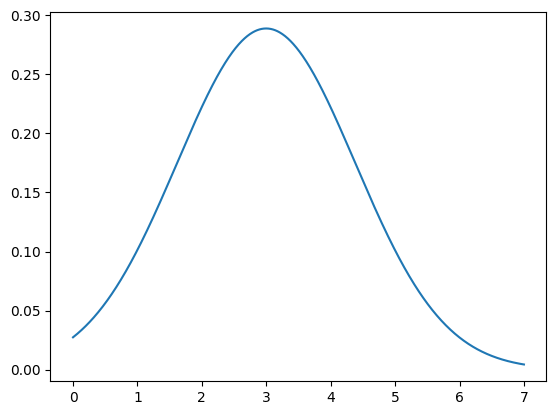

In [71]:
pdf_values = tip_distribution.pdf(x)
plt.plot(x, pdf_values)

In [74]:
tip_distribution.pdf(2.0) # close to mean, common

np.float64(0.22247394937314902)

In [75]:
tip_distribution.pdf(3.0) # near mean, more common

np.float64(0.28892090364886414)

In [76]:
tip_distribution.pdf(0.5)

np.float64(0.056225702304960615)

### CDF - Cumulative distribution function
What percentage of values are below this point?

for our tips array
- cdf(3.0) -> if mean is 3.0, this returns ~0.5 = 50% of tips are below 3 dollars
- cdf(5.0) -> returns ~0.95 = 96% of tips are below 5 dollars

## Linear regrassion
draws the best possible straight line through your scattered data points

In [ ]:
Mon - Fri
Tempreture outside
Cups Sold

        Temperature(C)  |    Cups Sold

Mon           15                120
Tue           18                105
Wed           10                145
Thu           12                135
Fri           20                95

> If tommorow 8C, how many cups should Maria prepare?

In [100]:
temperature = np.array([15, 18, 10, 12, 20, 8, 16, 14, 11, 19, 13, 17, 9, 22, 50]) # x axis
cups_sold = np.array([120, 105, 145, 135, 95, 155, 115, 125, 140, 100, 130, 110, 148, 88, 5]) # y axis

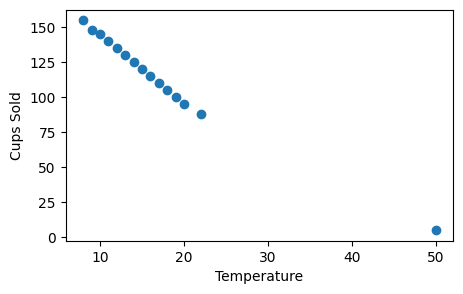

In [101]:
plt.figure(figsize = (5,3))
plt.scatter(temperature, cups_sold)
plt.xlabel('Temperature')
plt.ylabel('Cups Sold')

plt.show()

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(temperature, cups_sold) # linear regression(x,y)

line = slope * temperature + intercept

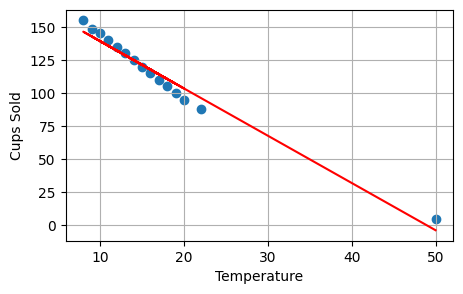

In [103]:
plt.figure(figsize = (5,3))
plt.scatter(temperature, cups_sold)
plt.plot(temperature, line, color = 'red')
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Cups Sold')

plt.show()

slope<br>
SLOPE tells us that for every 1C increase the temperature - Maria sells - 4.86 cups
<br><br>
intercept<br>
if it were 0C - Maria would sell 193 cups (theoreticaly) - this is the startiong point of our line

In [104]:
y = mx + b # every line has a simple equation
x - input, temperature
m - slope
b - intercept

NameError: name 'mx' is not defined

In [ ]:
Temperature matters, each degree change in temperature affects sales by ~4/5 cups.
    This gives Maria the power to predict and prepare accordingly

In [105]:
def predict_cups(temperature: int | float):
    prediction = slope * temperature + intercept
    return prediction

In [107]:
tommorow_temperature = 40
predict_cups(tommorow_temperature)

np.float64(31.96338586392372)